In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import  Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib
from sklearn.decomposition import  PCA
from sklearn.cluster import  KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#we can see that median house values are continuous and hence its a regression problem
#we have onne categorical feature (ocean_proximity)

# Data Visualisation:

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
#as we can see there are null values in total_bedrooms

In [7]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
df.shape

(20640, 10)

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
df['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [12]:
df['total_bedrooms'].value_counts

<bound method IndexOpsMixin.value_counts of 0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64>

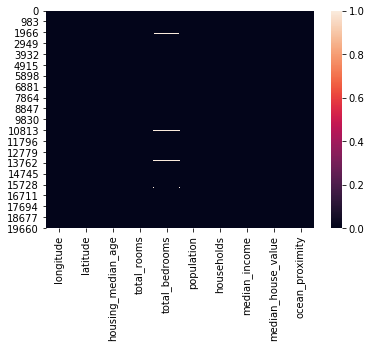

In [13]:
sns.heatmap(df.isnull())

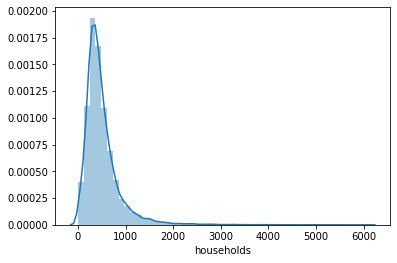

In [14]:
sns.distplot(df['households'])

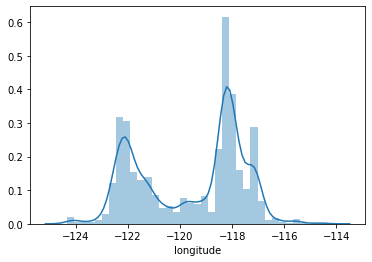

In [15]:
sns.distplot(df['longitude'])

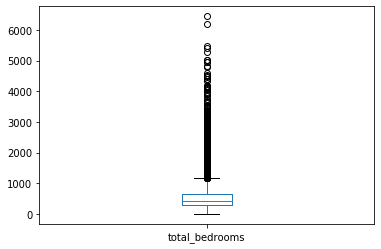

In [16]:
df['total_bedrooms'].plot.box()

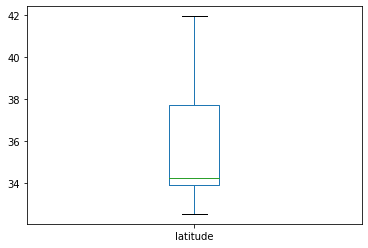

In [17]:
df['latitude'].plot.box()

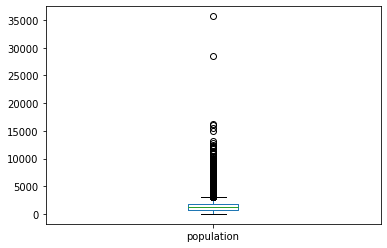

In [18]:
df['population'].plot.box()

Text(0, 0.5, 'frequency')

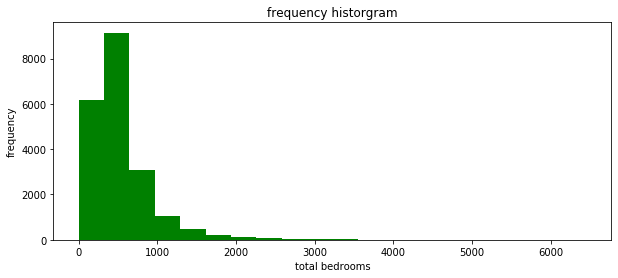

In [19]:
plt.figure(figsize=(10,4))
plt.hist(df[df['total_bedrooms'].notnull()]['total_bedrooms'],bins=20,color='green')
(df['total_bedrooms']>4000).sum()
plt.title('frequency historgram')
plt.xlabel('total bedrooms')
plt.ylabel('frequency')

In [20]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('float64'): Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value'],
       dtype='object'), dtype('O'): Index(['ocean_proximity'], dtype='object')}

In [21]:
from sklearn.preprocessing import Imputer

In [22]:
imp=Imputer(missing_values='NaN',strategy='mean')
df['total_bedrooms']=imp.fit_transform(df['total_bedrooms'].values.reshape(-1,1))

In [23]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [24]:
#now there is no null values

In [25]:
#now we have to convert the string into numerical data,so for that we use label encoder:
#which gives us more information about dataset:

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
df['ocean_proximity']=le.fit_transform(df['ocean_proximity'])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [28]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity         int32
dtype: object

# EDA:

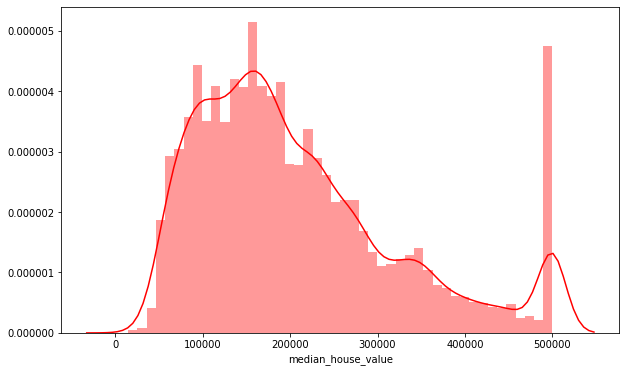

In [29]:
plt.figure(figsize=(10,6))
sns.distplot(df['median_house_value'],color='Red')
plt.show()

[]

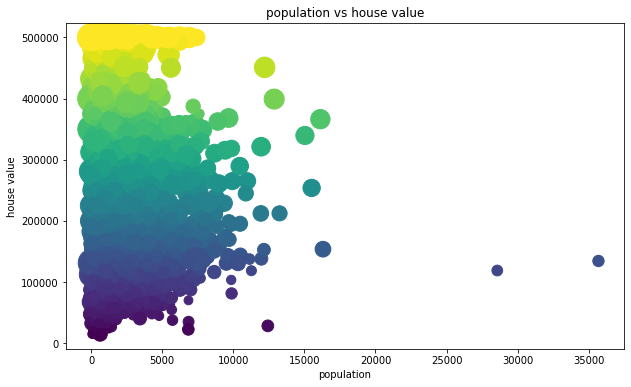

In [30]:
plt.figure(figsize=(10,6))

plt.scatter(df['population'],df['median_house_value'],c=df['median_house_value'],s=df['median_income']*50)
plt.colorbar
plt.title('population vs house value' )
plt.xlabel('population')
plt.ylabel('house value')
plt.plot()

In [31]:
df.ocean_proximity.value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

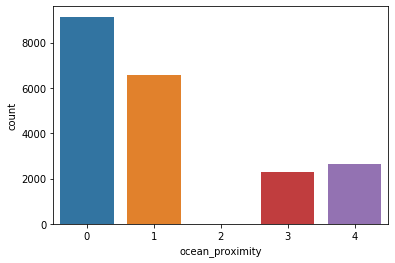

In [32]:
sns.countplot(df.ocean_proximity)

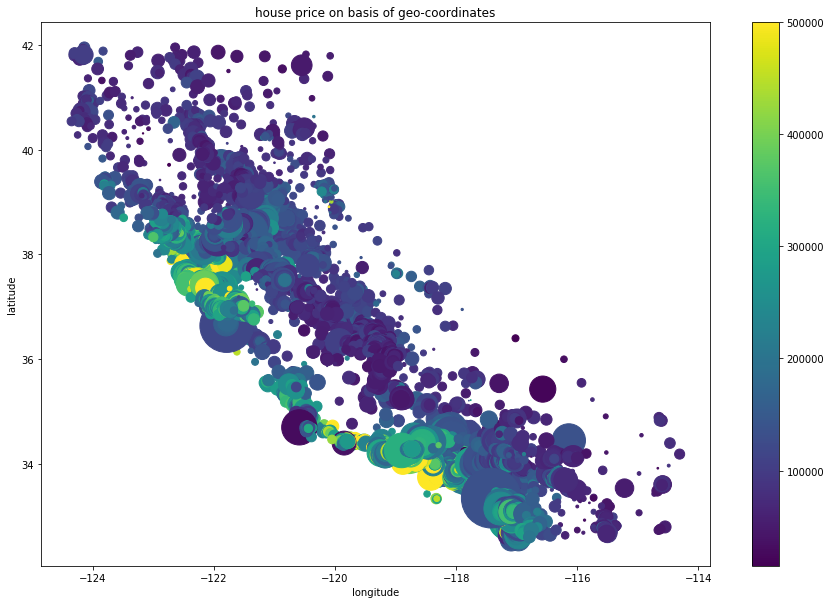

In [33]:
plt.figure(figsize=(15,10))
plt.scatter(df['longitude'],df['latitude'],c=df['median_house_value'],s=df['population']/10,cmap='viridis')
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('house price on basis of geo-coordinates')
plt.show()

[]

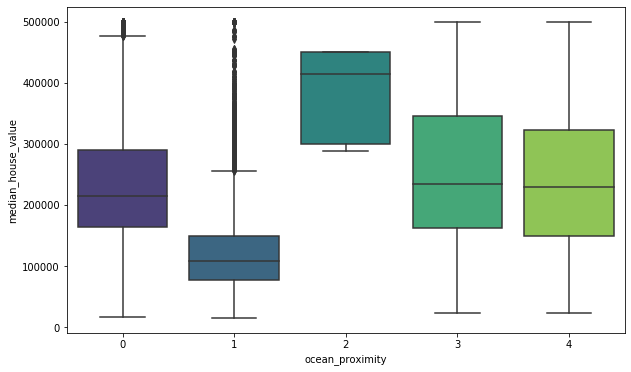

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value',palette='viridis')
plt.plot()

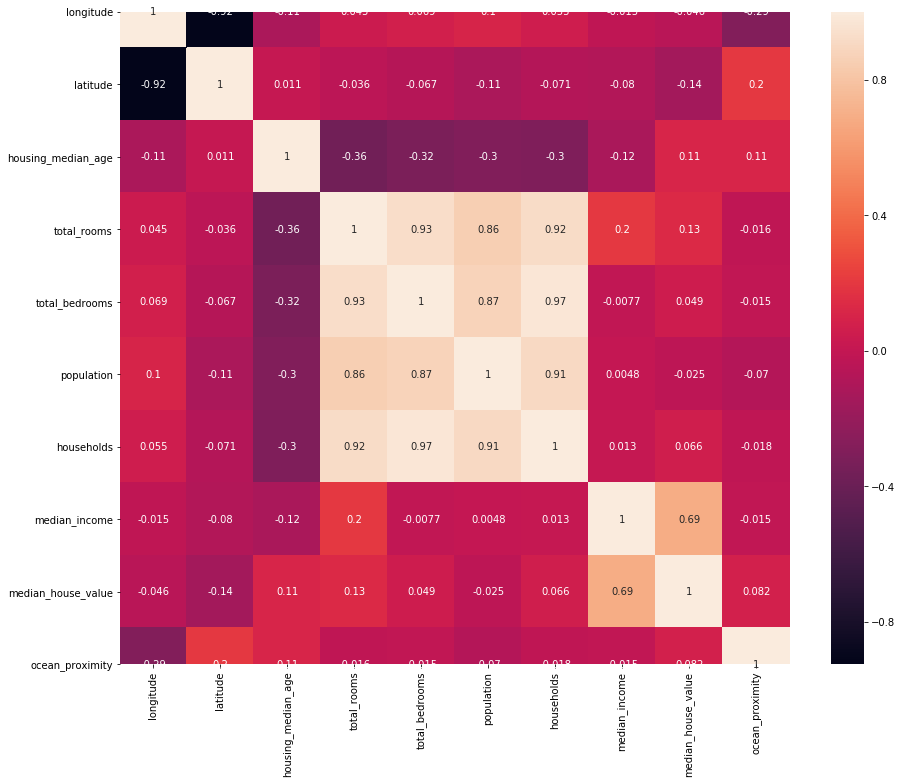

In [35]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)

In [36]:
df.corr().sort_values(ascending=False, by = 'median_house_value').median_house_value

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
ocean_proximity       0.081750
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

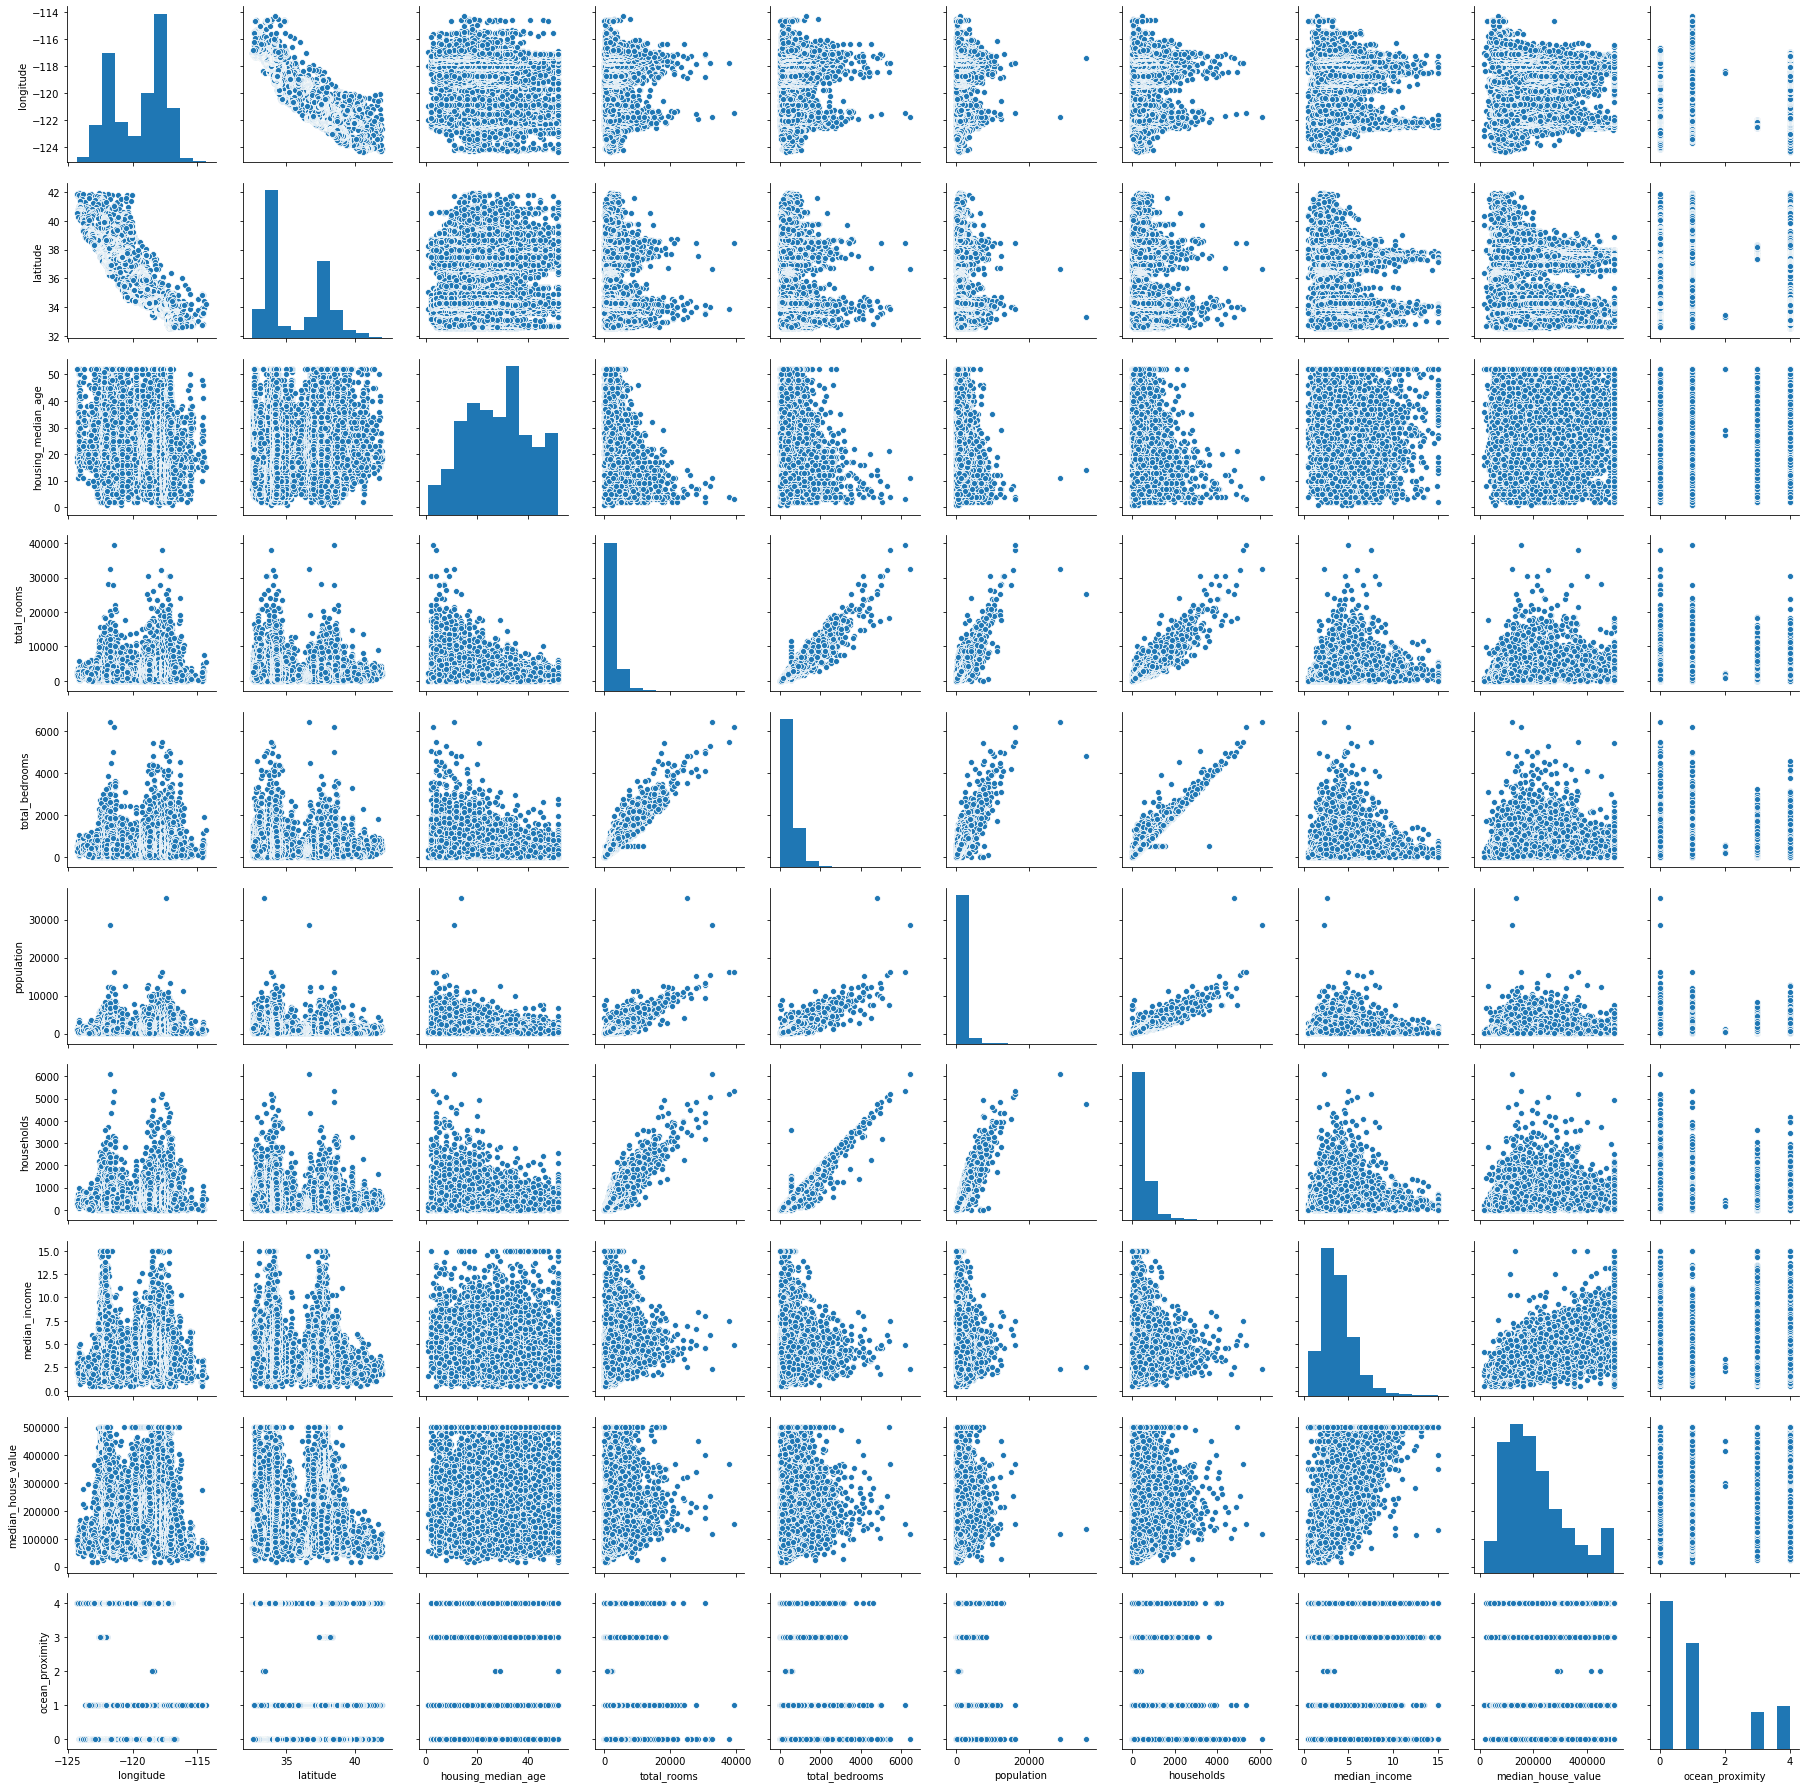

In [37]:
sns.pairplot(df)

In [38]:
#removing outliers:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.32783522, 1.05254828, 0.98214266, ..., 2.34476576, 2.12963148,
        1.2910888 ],
       [1.32284391, 1.04318455, 0.60701891, ..., 2.33223796, 1.31415614,
        1.2910888 ],
       [1.33282653, 1.03850269, 1.85618152, ..., 1.7826994 , 1.25869341,
        1.2910888 ],
       ...,
       [0.8237132 , 1.77823747, 0.92485123, ..., 1.14259331, 0.99274649,
        0.11673923],
       [0.87362627, 1.77823747, 0.84539315, ..., 1.05458292, 1.05860847,
        0.11673923],
       [0.83369581, 1.75014627, 1.00430931, ..., 0.78012947, 1.01787803,
        0.11673923]])

In [39]:
threshold=3
print(np.where(z>3))

(array([   95,    95,   104, ..., 20629, 20629, 20629], dtype=int64), array([4, 6, 4, ..., 4, 5, 6], dtype=int64))


In [40]:
z[95][4]

4.625163224783989

In [41]:
df_new=df[(z<3).all(axis=1)]

In [42]:
df_new.shape

(19746, 10)

In [43]:
df.shape

(20640, 10)

In [44]:
df=df_new

In [45]:
df.shape

(19746, 10)

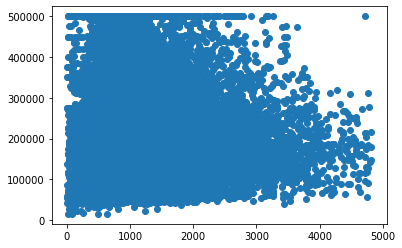

In [46]:
plt.scatter(df['population'],df['median_house_value'])
plt.show()

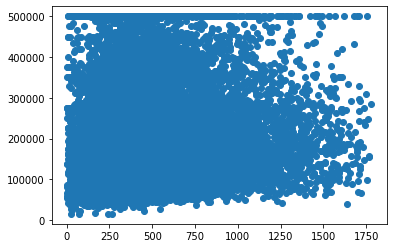

In [47]:
plt.scatter(df['total_bedrooms'],df['median_house_value'])
plt.show()

# Training & Testing:

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x=df.drop('median_house_value',axis=1).values
y=df['median_house_value'].values

In [53]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=52)

In [55]:
x_train.shape

(13229, 9)

In [56]:
x_test.shape

(6517, 9)

In [57]:
y_train.shape

(13229,)

In [58]:
y_test.shape

(6517,)

# ML Model-Linear Regression:

In [59]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x_train,y_train)
r2_score(linear_reg.predict(x_train),y_train)

0.41079877458077574

In [60]:
linear_reg.score(x_train,y_train)

0.6292469348783725

In [61]:
linear_reg.coef_

array([-79810.87700178, -85241.70618299,  15980.28275743, -24977.17971461,
        45613.64364397, -46428.79520105,  29908.34006078,  73316.20835288,
        -1182.4060014 ])

In [62]:
linear_reg.intercept_

201673.2480768804

In [63]:
#predict the value
pred=linear_reg.predict(x_test)

In [64]:
print("predicted result price :",pred)
print("actual price :",y_test)

predicted result price : [383818.27491152 198815.94695967 127238.04576104 ... 293758.79749255
  47632.97336005 338780.68196931]
actual price : [500001. 211700.  88200. ... 270500.  48000. 285400.]


# Cross Validation Score:

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [66]:
linear_re=LinearRegression()
lr_score=cross_val_score(linear_re,x_train,y_train, cv=10,)
print('Mean SCore',lr_score.mean())
print('Standard deviation',lr_score.std())

Mean SCore 0.6280016831021433
Standard deviation 0.014485903141895738


In [67]:
y_pred=cross_val_predict(linear_re,x_train,y_train,cv=10)
print('y prediction values')
print(y_pred)

y prediction values
[274445.4597492  250931.66405006 135735.80159877 ... 162535.5529118
 304787.3664049  268828.35549335]


# Lasso & Ridge:

In [68]:
from sklearn.linear_model import Lasso,Ridge

In [80]:
lasso_reg = linear_model.Lasso(random_state=19) 
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=19,
      selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
r2_score(lasso_reg.predict(x_train),y_train)

0.41073705472725963

In [83]:
lasso_score = r2_score(lasso_reg.predict(x_test),y_test) 
lasso_score

0.41085440428283027

In [84]:
lasso_reg.coef_

array([-79798.01055295, -85229.66534978,  15981.0415299 , -24963.93519488,
        45602.64870049, -46421.50629186,  29900.26548868,  73313.05545989,
        -1179.5957713 ])

In [86]:
ridge_reg = linear_model.Ridge(random_state=19) 
ridge_reg.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=19, solver='auto', tol=0.001)

In [87]:
r2_score(ridge_reg.predict(x_train),y_train)

0.41050828527058936

In [88]:
ridge_score = r2_score(ridge_reg.predict(x_test),y_test)
ridge_score

0.4106212436150315

In [89]:
ridge_reg.coef_

array([-79708.68610002, -85141.16543001,  15989.88907263, -24958.47996235,
        45561.74102626, -46406.41323694,  29925.30249766,  73315.93888451,
        -1171.7531896 ])

# Decision Tree Regressor:

In [90]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [91]:
r2_score(tree_reg.predict(x_train),y_train)

1.0

In [92]:
cross_val_score(tree_reg, x_train, y_train, cv=10)

array([0.50782467, 0.60108112, 0.61837555, 0.62727386, 0.57278844,
       0.56886814, 0.57042052, 0.56939258, 0.65783123, 0.59139184])

In [93]:
tree_score = r2_score(tree_reg.predict(x_test),y_test) 
tree_score

0.5795777438797127

# Random Forest Regressor:

In [94]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [95]:
forest_reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [96]:
r2_score(forest_reg.predict(x_train),y_train)

0.9549102888257225

In [97]:
cross_val_score(forest_reg, x_train, y_train, cv=10)

array([0.76269956, 0.75163856, 0.77628874, 0.76637944, 0.77392173,
       0.74770579, 0.76590877, 0.7647261 , 0.79779678, 0.75751415])

In [98]:
forest_score = r2_score(forest_reg.predict(x_test),y_test)

In [99]:
forest_score

0.7081114430836756

In [102]:
#So, the random forest regressor is winner here out of all the ML Algorithm